<!-- Column Profiling:
MMMM-YY : Reporting Date (Monthly)
Driver_ID : Unique id for drivers
Age : Age of the driver
Gender : Gender of the driver – Male : 0, Female: 1
City : City Code of the driver
Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
Income : Monthly average Income of the driver
Date Of Joining : Joining date for the driver
LastWorkingDate : Last date of working for the driver
Joining Designation : Designation of the driver at the time of joining
Grade : Grade of the driver at the time of reporting
Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better) -->

### Column profile

#### MMMM-YY : Reporting Date (Monthly)
#### Driver_ID : Unique id for drivers
#### Age : Age of the driver
#### Gender : Gender of the driver – Male : 0, Female: 1
#### City : City Code of the driver
#### Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
#### Income : Monthly average Income of the driver
#### Date Of Joining : Joining date for the driver
#### LastWorkingDate : Last date of working for the driver
#### Joining Designation : Designation of the driver at the time of joining
#### Grade : Grade of the driver at the time of reporting
#### Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
#### Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')

In [3]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
df.shape

(19104, 14)

In [5]:
#Dropping 'Unnamed: 0' column

df.drop(columns='Unnamed: 0', inplace=True, axis=1)

In [6]:
df.shape

(19104, 13)

In [7]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [8]:
df.dtypes

MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

In [9]:
#Converting date columns to date format

df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [10]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [11]:
#Counting nulls

df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [13]:
#Aggregating on driver ids and reporting dates

function_dict = {'Age': 'max', 'Gender': 'first', 'City': 'last', 'Education_Level': 'last', 'Income': 'last', 'Dateofjoining': 'last',
                 'LastWorkingDate': 'last', 'Joining Designation': 'last', 'Grade': 'last', 'Total Business Value': 'sum', 'Quarterly Rating': 'last'}

temp_df = df.groupby(['Driver_ID', 'MMM-YY']).aggregate(function_dict).reset_index()


In [14]:
temp_df

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,2019-01-01,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,1,2019-02-01,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,1,2019-03-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2,2020-11-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2,2020-12-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,2020-08-01,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,2788,2020-09-01,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,2788,2020-10-01,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,2788,2020-11-01,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2


In [15]:
new_df = temp_df.sort_index(ascending=[True, True])

In [16]:
#New dataframe to store unique records of drivers.

df1 = pd.DataFrame()

In [17]:
df1['Driver_ID'] = new_df['Driver_ID'].unique()

In [18]:
df1.shape

(2381, 1)

In [19]:
#Shrinking multiple driver entries to single entry.

df1['Age'] = list(new_df.groupby('Driver_ID').agg({'Age': 'max'})['Age'])
df1['Gender'] = list(new_df.groupby('Driver_ID').agg({'Gender': 'last'})['Gender'])
df1['City'] = list(new_df.groupby('Driver_ID').agg({'City': 'last'})['City'])
df1['Education_Level'] = list(new_df.groupby('Driver_ID').agg({'Education_Level': 'last'})['Education_Level'])
df1['Income'] = list(new_df.groupby('Driver_ID').agg({'Income': 'last'})['Income'])
df1['Joining Designation'] = list(new_df.groupby('Driver_ID').agg({'Joining Designation': 'last'})['Joining Designation'])
df1['Dateofjoining'] = list(new_df.groupby('Driver_ID').agg({'Dateofjoining': 'last'})['Dateofjoining'])
df1['LastWorkingDate'] = list(new_df.groupby('Driver_ID').agg({'LastWorkingDate': 'last'})['LastWorkingDate'])
df1['Grade'] = list(df.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
df1['Total_Business_Value'] = list(df.groupby('Driver_ID',axis=0).sum('Total Business Value')['Total Business Value'])
df1['Last_Quarterly_Rating'] = list(df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])

In [20]:
df1.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Dateofjoining,LastWorkingDate,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1,28.0,0.0,C23,2,57387,1,2018-12-24,2019-03-11,1,1715580,2
1,2,31.0,0.0,C7,2,67016,2,2020-11-06,NaT,2,0,1
2,4,43.0,0.0,C13,2,65603,2,2019-12-07,2020-04-27,2,350000,1
3,5,29.0,0.0,C9,0,46368,1,2019-01-09,2019-03-07,1,120360,1
4,6,31.0,1.0,C11,1,78728,3,2020-07-31,NaT,3,1265000,2


#### Feature Engineering

In [21]:
#Creating target variable - driver churned or not
# 1 - Churned
# 0 - Not Churned

def check(val):
    """Takes boolean value and returns 0 if True else 1"""
    if val == True:
        return 0
    else:
        return 1

df1['Target_Churn'] = df1['LastWorkingDate'].isnull().apply(check)
df1.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Dateofjoining,LastWorkingDate,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_Churn
0,1,28.0,0.0,C23,2,57387,1,2018-12-24,2019-03-11,1,1715580,2,1
1,2,31.0,0.0,C7,2,67016,2,2020-11-06,NaT,2,0,1,0
2,4,43.0,0.0,C13,2,65603,2,2019-12-07,2020-04-27,2,350000,1,1
3,5,29.0,0.0,C9,0,46368,1,2019-01-09,2019-03-07,1,120360,1,1
4,6,31.0,1.0,C11,1,78728,3,2020-07-31,NaT,3,1265000,2,0


In [22]:
new_df

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,2019-01-01,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,1,2019-02-01,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,1,2019-03-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2,2020-11-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2,2020-12-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,2020-08-01,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,2788,2020-09-01,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,2788,2020-10-01,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,2788,2020-11-01,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2


In [23]:
#Creating column - quarterly rating increased or not.

qrf = new_df.groupby('Driver_ID').agg({'Quarterly Rating': 'first'}).reset_index()

qrl = new_df.groupby('Driver_ID').agg({'Quarterly Rating': 'last'}).reset_index()

def check_rating(val):
    """Takes boolean value and returns 1 if True else 0"""
    if val == True:
        return 1
    else:
        return 0
    
df1['QR_Increased'] = (qrl['Quarterly Rating'] > qrf['Quarterly Rating']).apply(check_rating)
df1

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Dateofjoining,LastWorkingDate,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_Churn,QR_Increased
0,1,28.0,0.0,C23,2,57387,1,2018-12-24,2019-03-11,1,1715580,2,1,0
1,2,31.0,0.0,C7,2,67016,2,2020-11-06,NaT,2,0,1,0,0
2,4,43.0,0.0,C13,2,65603,2,2019-12-07,2020-04-27,2,350000,1,1,0
3,5,29.0,0.0,C9,0,46368,1,2019-01-09,2019-03-07,1,120360,1,1,0
4,6,31.0,1.0,C11,1,78728,3,2020-07-31,NaT,3,1265000,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,2,2015-10-15,NaT,3,21748820,4,0,1
2377,2785,34.0,1.0,C9,0,12105,1,2020-08-28,2020-10-28,1,0,1,1,0
2378,2786,45.0,0.0,C19,0,35370,2,2018-07-31,2019-09-22,2,2815090,1,1,0
2379,2787,28.0,1.0,C20,2,69498,1,2018-07-21,2019-06-20,1,977830,1,1,0


In [24]:
#Creating new column - monthly income increased or not

m_income_f = new_df.groupby('Driver_ID').agg({'Income': 'first'}).reset_index()

m_income_l = new_df.groupby('Driver_ID').agg({'Income': 'last'}).reset_index()
    
df1['MI_Increased'] = (m_income_l['Income'] > m_income_f['Income']).apply(check_rating)
df1

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Dateofjoining,LastWorkingDate,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_Churn,QR_Increased,MI_Increased
0,1,28.0,0.0,C23,2,57387,1,2018-12-24,2019-03-11,1,1715580,2,1,0,0
1,2,31.0,0.0,C7,2,67016,2,2020-11-06,NaT,2,0,1,0,0,0
2,4,43.0,0.0,C13,2,65603,2,2019-12-07,2020-04-27,2,350000,1,1,0,0
3,5,29.0,0.0,C9,0,46368,1,2019-01-09,2019-03-07,1,120360,1,1,0,0
4,6,31.0,1.0,C11,1,78728,3,2020-07-31,NaT,3,1265000,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,2,2015-10-15,NaT,3,21748820,4,0,1,0
2377,2785,34.0,1.0,C9,0,12105,1,2020-08-28,2020-10-28,1,0,1,1,0,0
2378,2786,45.0,0.0,C19,0,35370,2,2018-07-31,2019-09-22,2,2815090,1,1,0,0
2379,2787,28.0,1.0,C20,2,69498,1,2018-07-21,2019-06-20,1,977830,1,1,0,0


In [25]:
df1['MI_Increased'].value_counts()

MI_Increased
0    2338
1      43
Name: count, dtype: int64

In [26]:
#Dropping unnecessary columns.

df1.drop(['Dateofjoining','LastWorkingDate'], axis=1, inplace=True)

In [27]:
df1

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_Churn,QR_Increased,MI_Increased
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,1,0,0
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0,0
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,1,0,0
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,1,0,0
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,2,3,21748820,4,0,1,0
2377,2785,34.0,1.0,C9,0,12105,1,1,0,1,1,0,0
2378,2786,45.0,0.0,C19,0,35370,2,2,2815090,1,1,0,0
2379,2787,28.0,1.0,C20,2,69498,1,1,977830,1,1,0,0


In [28]:
#Statistical summary.

df1.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_Churn,QR_Increased,MI_Increased
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.663167,0.410332,1.00756,59334.157077,1.820244,2.096598,4.586742e+06,1.427971,0.678706,0.150357,0.018060
std,806.161628,5.983375,0.491997,0.81629,28383.666384,0.841433,0.941522,9.127115e+06,0.809839,0.467071,0.357496,0.133195
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,1.000000,0.000000,0.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,2.000000,1.000000,0.000000,0.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,1.000000,1.000000,1.000000


#### Exploratory Data Analysis

<Axes: >

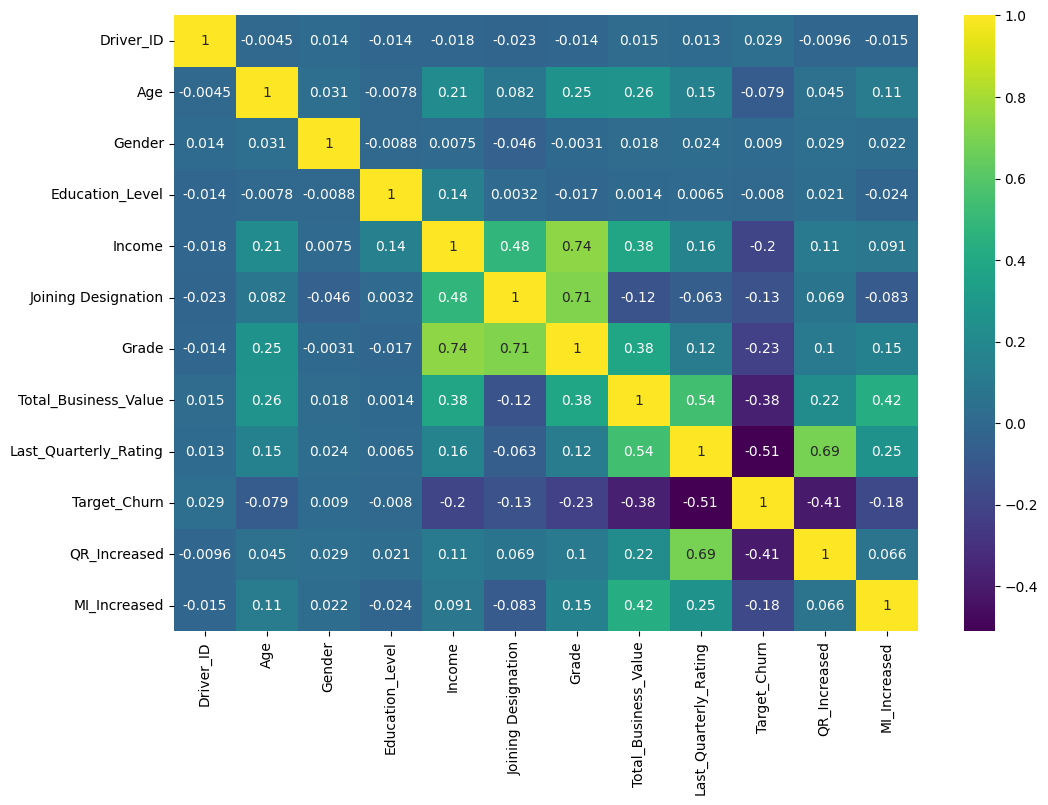

In [29]:
#Correlation heatmap of numerical columns.

df_corr = df1.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(), annot=True, cmap='viridis')

#### Inference - Correlation matrix
##### None of the features are particularly highly correlated either positively or negatively, which means the features are independent and add exclusive information to the dataset. Hence we proceed with all of these columns.

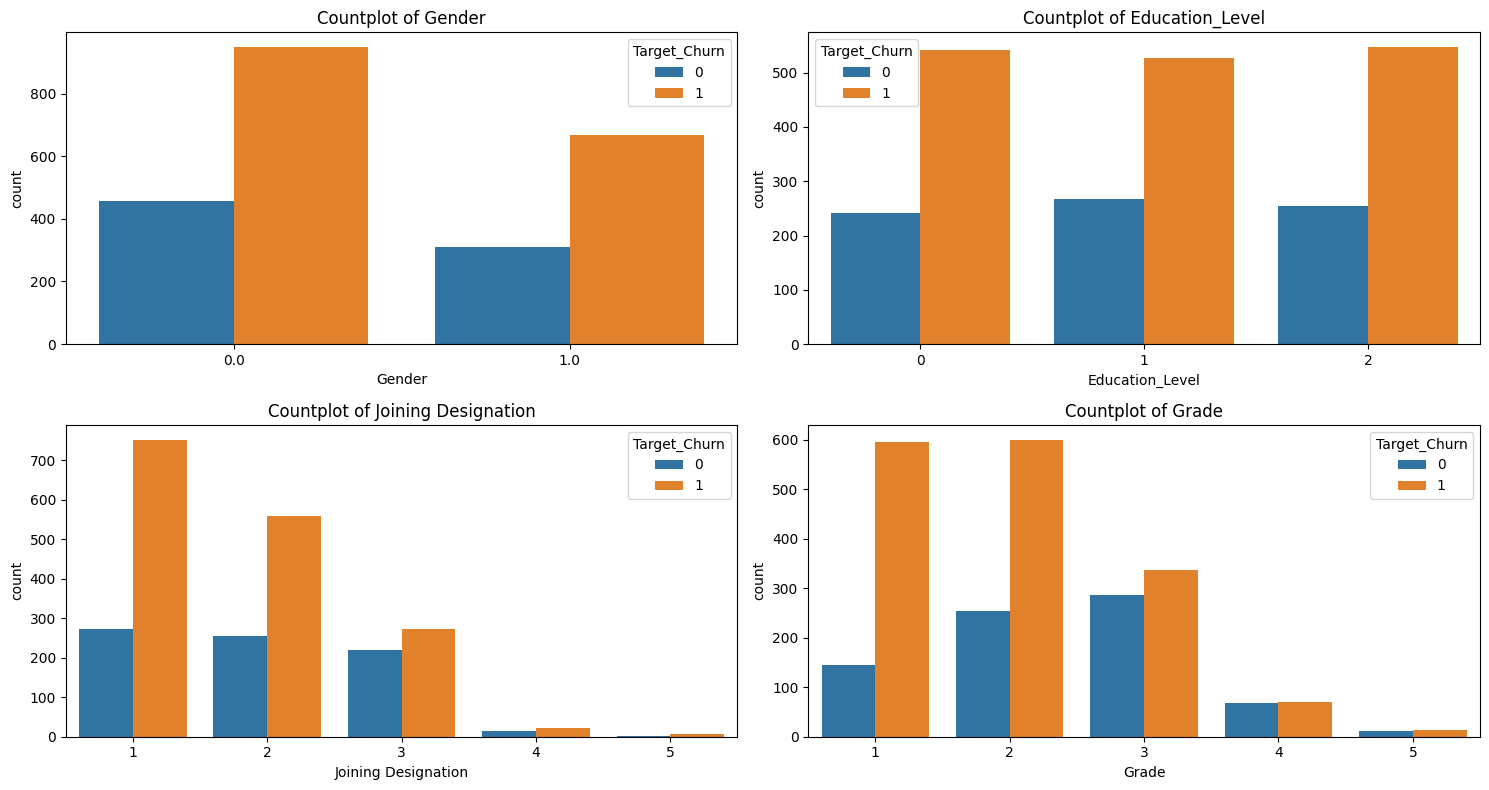

In [30]:
#Countplots of categorical features.

lst = ['Gender', 'Education_Level', 'Joining Designation', 'Grade']

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

axes = axes.flatten()

for i, val in enumerate(lst):
    sns.countplot(data=df1, x=val, hue='Target_Churn', ax=axes[i])
    axes[i].set_title(f"Countplot of {val}")

for j in range(len(lst), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()

#### Inferences for countplot.

#####  - Males tend to churn more than females but we should keep in mind that the number of males in more as compared to females in the dataset.
#####  - No particuler impact of education level on churn or not churn.
#####  - Joining designation '1' are more likely to churn as compared to others.
#####  - Grades '1' and '2' are more likely to churn than other grades.

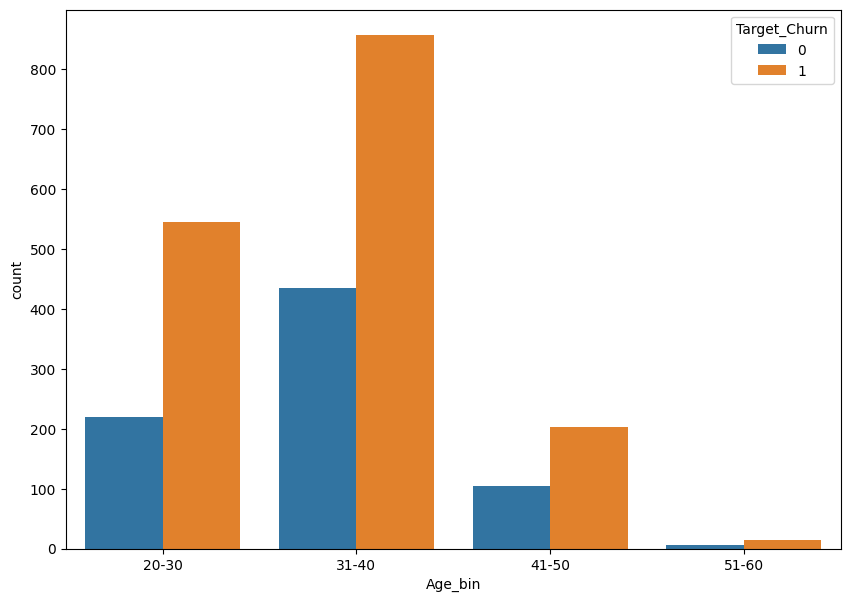

In [31]:
#Countplot of Age feature after binning.

bins = [20,30,40,50,60]
labels = ["20-30","31-40","41-50","51-60"]
df1["Age_bin"] = pd.cut(df1["Age"],
                     labels = labels,
                     bins = bins)
plt.figure(figsize = (10,7))
sns.countplot(df1,x = 'Age_bin',hue = "Target_Churn")
plt.show()

#### - Ages between 31-40 are more likely to churn as compared to other ages.

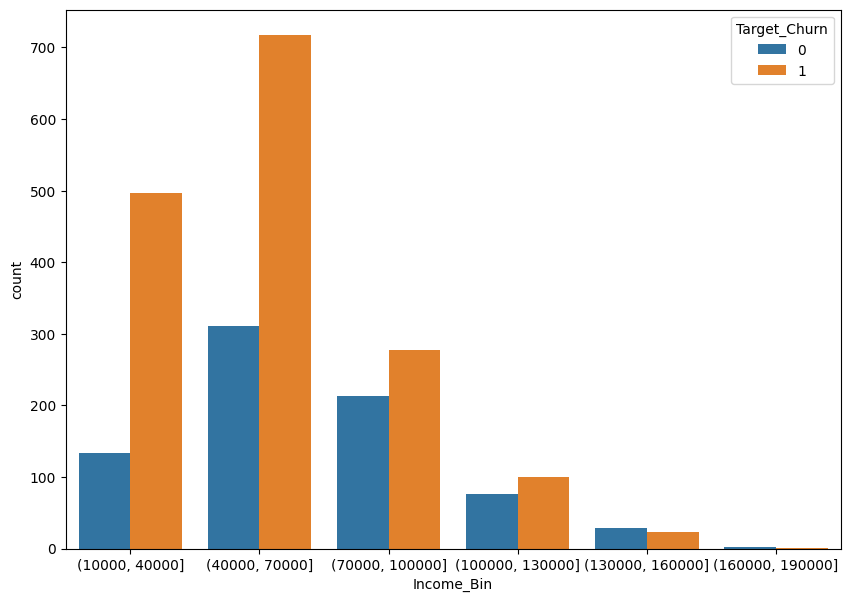

In [32]:
#Countplot of Income feature after binning.

df1['Income_Bin'] = pd.cut(df1['Income'],bins=[10000, 40000, 70000, 100000, 130000, 160000, 190000 ])

plt.figure(figsize = (10,7))
sns.countplot(df1,x = 'Income_Bin',hue = "Target_Churn")
plt.show()

#### - Drivers with income between 40000-70000 are more likely to churn as compared to other income levels.

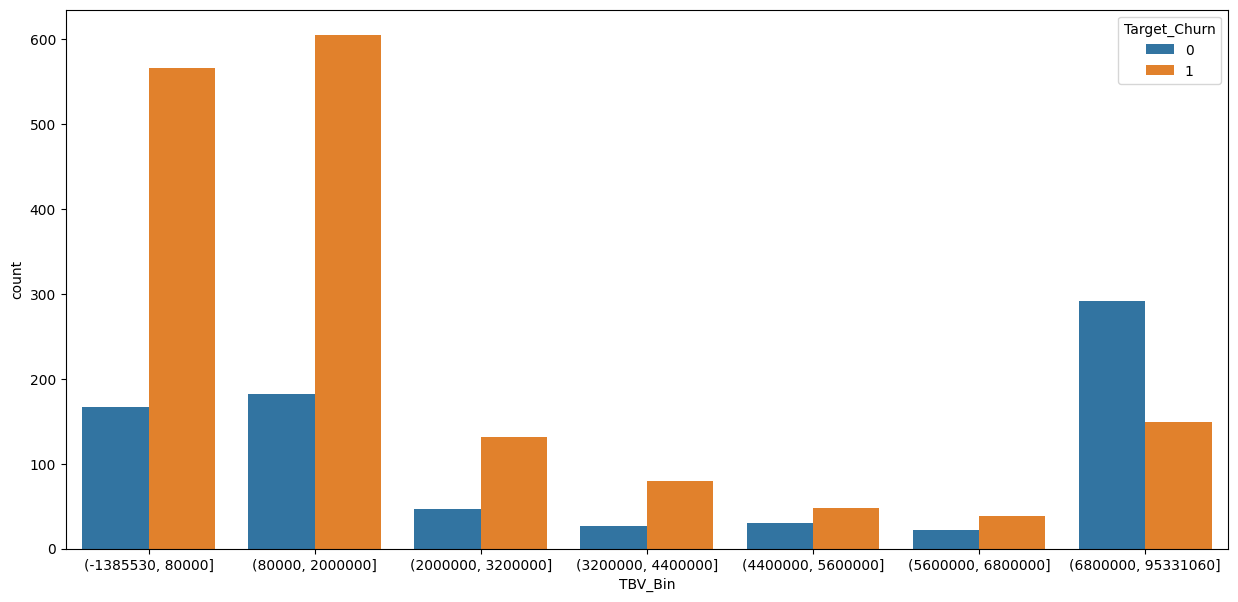

In [33]:
#Countplot of Total business value feature after binning.

m1 = round(df1['Total_Business_Value'].min())
m2 = round(df1['Total_Business_Value'].max())
bins = [m1, 80000 , 2000000 , 3200000, 4400000, 5600000, 6800000, m2]

df1['TBV_Bin'] = pd.cut(df1['Total_Business_Value'],bins)

plt.figure(figsize=(15,7))
sns.countplot(df1, x = 'TBV_Bin', hue = "Target_Churn")
plt.show()

#### - Drivers generating business value less than 2000000 for the company are more likely to churn.

#### Outlier detection

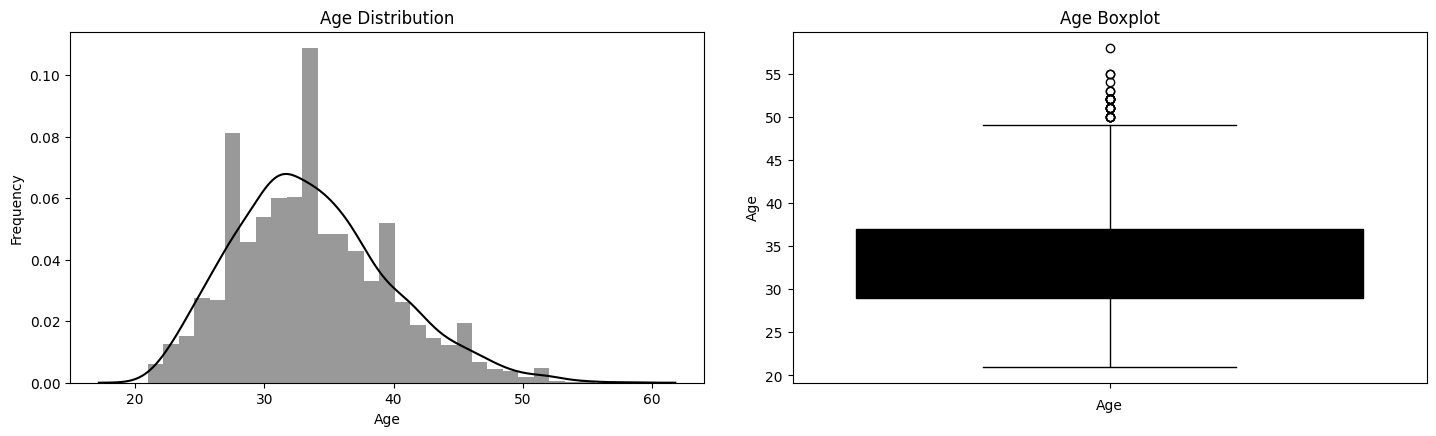

In [34]:
#Age distribution.

plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.distplot(df1["Age"], kde=True, color="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(122)
sns.boxplot(y=df1["Age"], color="black")
plt.title("Age Boxplot")
plt.xlabel("Age")

plt.tight_layout(pad=3)
plt.show()

#### - Age is normally distributed as expected with slight skewness to the right side indicating some outliers.

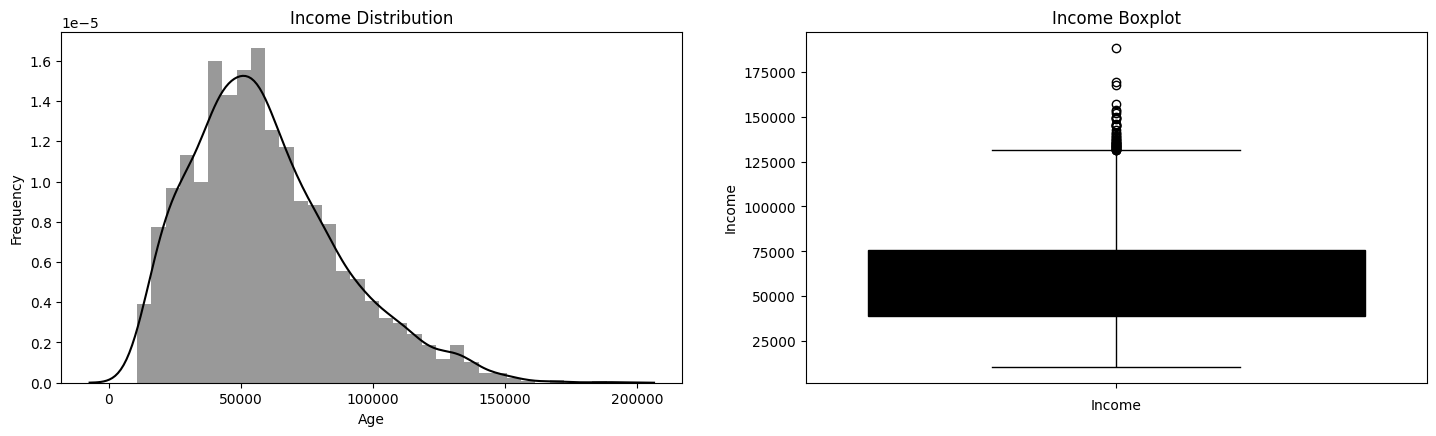

In [35]:
#Income distribution.

plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.distplot(df1["Income"], kde=True, color="black")
plt.title("Income Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(122)
sns.boxplot(y=df1["Income"], color="black")
plt.title("Income Boxplot")
plt.xlabel("Income")

plt.tight_layout(pad=3)
plt.show()

#### - Income is right skewed indicating outliers.

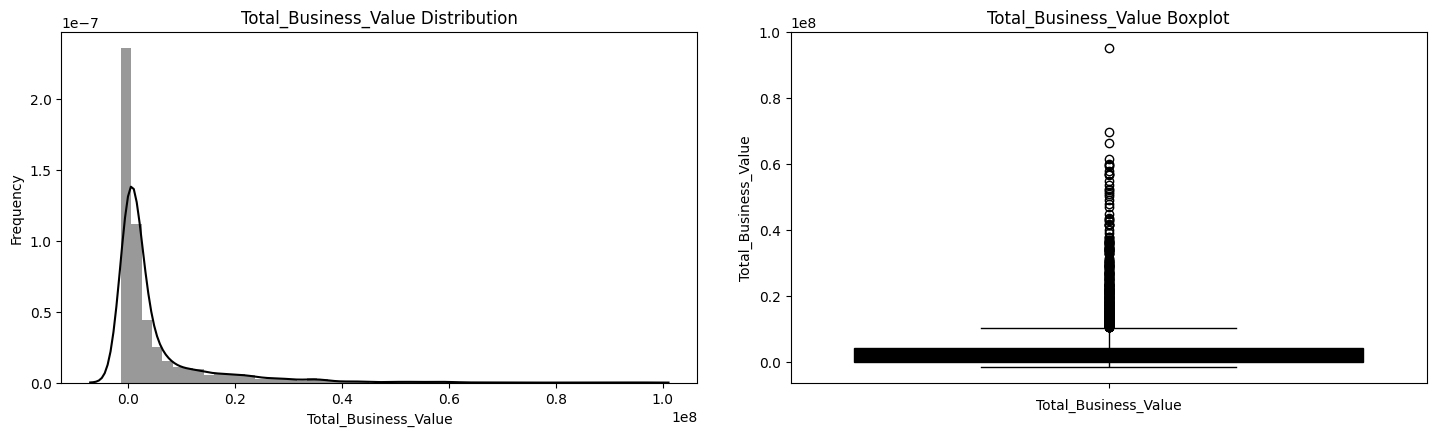

In [36]:
#Total_Business_Value distribution.

plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.distplot(df1["Total_Business_Value"], kde=True, color="black")
plt.title("Total_Business_Value Distribution")
plt.xlabel("Total_Business_Value")
plt.ylabel("Frequency")

plt.subplot(122)
sns.boxplot(y=df1["Total_Business_Value"], color="black")
plt.title("Total_Business_Value Boxplot")
plt.xlabel("Total_Business_Value")

plt.tight_layout(pad=3)
plt.show()

#### - Total business value is heavily skewed to the right side, indicating presence of large number of outliers.

#### Removing the outliers would lead to significant loss of data which will impact model training, hence they are kept as is.

#### Target Encoding of categorical columns

In [37]:
#Dropping bin columns.

df1.drop(['Age_bin', 'Income_Bin', 'TBV_Bin'], axis=1, inplace=True)

In [38]:
df1

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_Churn,QR_Increased,MI_Increased
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,1,0,0
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0,0
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,1,0,0
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,1,0,0
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,2,3,21748820,4,0,1,0
2377,2785,34.0,1.0,C9,0,12105,1,1,0,1,1,0,0
2378,2786,45.0,0.0,C19,0,35370,2,2,2815090,1,1,0,0
2379,2787,28.0,1.0,C20,2,69498,1,1,977830,1,1,0,0


In [39]:
df1['City'].nunique()

29

In [40]:
#Creating a copy of the data as backup for later use.

df_copy = df1.copy(deep=True)

In [41]:
#Transforming city column on df1.

df1['City'] = df1.groupby('City')['Target_Churn'].transform('mean')


In [42]:
#Transforming city column on df_copy.

df_copy['City'] = df_copy.groupby('City')['Target_Churn'].transform('mean')

In [43]:
df_copy.drop('Driver_ID', axis=1, inplace=True)

In [44]:
df1['City'].nunique()

29

In [45]:
df1.drop('Driver_ID', axis=1, inplace=True)

In [46]:
df1

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_Churn,QR_Increased,MI_Increased
0,28.0,0.0,0.770270,2,57387,1,1,1715580,2,1,0,0
1,31.0,0.0,0.684211,2,67016,2,2,0,1,0,0,0
2,43.0,0.0,0.816901,2,65603,2,2,350000,1,1,0,0
3,29.0,0.0,0.706667,0,46368,1,1,120360,1,1,0,0
4,31.0,1.0,0.703125,1,78728,3,3,1265000,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,0.0,0.698630,0,82815,2,3,21748820,4,0,1,0
2377,34.0,1.0,0.706667,0,12105,1,1,0,1,1,0,0
2378,45.0,0.0,0.569444,0,35370,2,2,2815090,1,1,0,0
2379,28.0,1.0,0.730263,2,69498,1,1,977830,1,1,0,0


In [47]:
df_copy

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Target_Churn,QR_Increased,MI_Increased
0,28.0,0.0,0.770270,2,57387,1,1,1715580,2,1,0,0
1,31.0,0.0,0.684211,2,67016,2,2,0,1,0,0,0
2,43.0,0.0,0.816901,2,65603,2,2,350000,1,1,0,0
3,29.0,0.0,0.706667,0,46368,1,1,120360,1,1,0,0
4,31.0,1.0,0.703125,1,78728,3,3,1265000,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,0.0,0.698630,0,82815,2,3,21748820,4,0,1,0
2377,34.0,1.0,0.706667,0,12105,1,1,0,1,1,0,0
2378,45.0,0.0,0.569444,0,35370,2,2,2815090,1,1,0,0
2379,28.0,1.0,0.730263,2,69498,1,1,977830,1,1,0,0


#### Checking class imbalance

In [48]:
df1['Target_Churn'].value_counts(normalize=True)*100

Target_Churn
1    67.870643
0    32.129357
Name: proportion, dtype: float64

#### - The proportion of negative class is significantly lower than the positive class, which might make the model biased during training, so we proceed with oversampling the minority class using SMOTE.

#### Scaling and Preprocessing

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [50]:
#Handling class imbalance using SMOTE

X = df1.drop('Target_Churn', axis=1)
Y = df1['Target_Churn']

smt = SMOTE()
X_sm, Y_sm = smt.fit_resample(X,Y)

In [51]:
Y_sm.value_counts()

Target_Churn
1    1616
0    1616
Name: count, dtype: int64

In [52]:
X_sm.shape

(3232, 11)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=42)

In [54]:
X_train.shape

(2585, 11)

In [55]:
# Scaling the data using Standard Scaler.

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [56]:
X_train_scaled

array([[ 1.74935409,  1.26742123,  0.01724299, ..., -0.63670302,
        -0.44980616, -0.1285143 ],
       [-1.18988941,  1.26742123,  1.4045601 , ..., -0.63670302,
        -0.44980616, -0.1285143 ],
       [-1.70857944, -0.86479544,  1.57309479, ..., -0.63670302,
        -0.44980616, -0.1285143 ],
       ...,
       [-0.49830271, -0.86479544,  0.8778287 , ..., -0.63670302,
        -0.44980616, -0.1285143 ],
       [-0.49830271, -0.86479544, -0.31176998, ..., -0.63670302,
        -0.44980616, -0.1285143 ],
       [ 0.19367403, -0.86479544,  0.5456246 , ..., -0.63670302,
        -0.44980616, -0.1285143 ]])

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve, precision_recall_curve, auc

##### Type 1 error: False positive - Driver was predicted to churn but actually did not churn.
##### Type 2 error: False negative - Driver was predicted to not churn but actually churned.

##### We infer for the business that acquiring a new driver is more expensive than retaining a current one. Although both Type 1 and Type 2 error are crucial for the business, Type 2 error can impact the revenue and profit margin more than Type 1.

##### So for evaluating the models that follow, we try to focus on minimizing Type 2 errors and High Recall value.

#### Model Building with Decision Tree Classifier

In [63]:
#Cross-validating on different depths to find the best hyperparameters.

depths = [3, 5, 7, 11, 13, 15, 19, 20]

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for depth in depths:

    dtc = DecisionTreeClassifier(max_depth=depth, random_state=42)

    cv_results = cross_validate(dtc, X_train_scaled, Y_train, cv=kfold, scoring='accuracy', return_train_score=True)

    print(f"KFold depth: {depth}, Train Mean Accuracy: {cv_results['train_score'].mean()}, Test Mean Accuracy: {cv_results['test_score'].mean()}")

KFold depth: 3, Train Mean Accuracy: 0.7532882011605415, Test Mean Accuracy: 0.7473887814313346
KFold depth: 5, Train Mean Accuracy: 0.7691489361702128, Test Mean Accuracy: 0.7524177949709865
KFold depth: 7, Train Mean Accuracy: 0.8287234042553191, Test Mean Accuracy: 0.7686653771760155
KFold depth: 11, Train Mean Accuracy: 0.9187620889748549, Test Mean Accuracy: 0.7558994197292069
KFold depth: 13, Train Mean Accuracy: 0.9579303675048356, Test Mean Accuracy: 0.7516441005802708
KFold depth: 15, Train Mean Accuracy: 0.9794003868471954, Test Mean Accuracy: 0.7562862669245649
KFold depth: 19, Train Mean Accuracy: 0.9967117988394584, Test Mean Accuracy: 0.7520309477756286
KFold depth: 20, Train Mean Accuracy: 0.9982591876208898, Test Mean Accuracy: 0.7504835589941973


#### We can see that the decision tree is overfitting as the depth in increasing with mean accuracy of nearly 1 at depth 20, but the performance on test is poor. We go ahead with depth of 5 as it gives a balance between bias and variance.

In [64]:
#Bulding Decision Tree model with the best hyperparameters.

dtc_final = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc_final.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

0.772147001934236
              precision    recall  f1-score   support

           0       0.88      0.63      0.73      1290
           1       0.71      0.91      0.80      1295

    accuracy                           0.77      2585
   macro avg       0.80      0.77      0.77      2585
weighted avg       0.80      0.77      0.77      2585



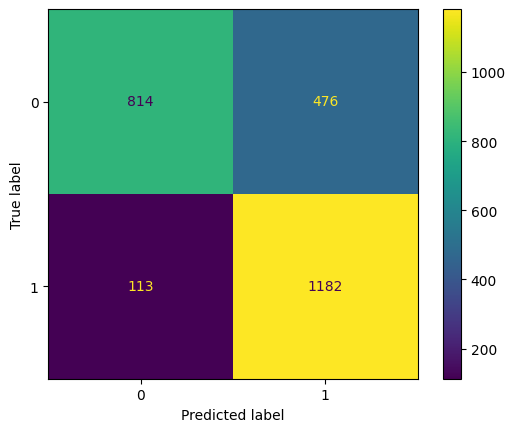

In [65]:
#Prediction on train.

y_pred_lgbm_test = dtc_final.predict(X_train_scaled)

print(accuracy_score(Y_train, y_pred_lgbm_test))

conf_mat = confusion_matrix(Y_train, y_pred_lgbm_test)

ConfusionMatrixDisplay(conf_mat).plot()

print(classification_report(Y_train, y_pred_lgbm_test))

plt.show()

0.7279752704791345
              precision    recall  f1-score   support

           0       0.84      0.56      0.68       326
           1       0.67      0.89      0.77       321

    accuracy                           0.73       647
   macro avg       0.76      0.73      0.72       647
weighted avg       0.76      0.73      0.72       647



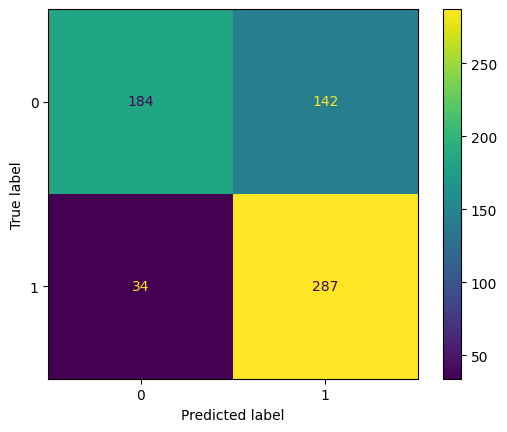

In [66]:
#Prediction on test data.

y_pred_lgbm_test = dtc_final.predict(X_test_scaled)

print(accuracy_score(Y_test, y_pred_lgbm_test))

conf_mat2 = confusion_matrix(Y_test, y_pred_lgbm_test)

ConfusionMatrixDisplay(conf_mat2).plot()

print(classification_report(Y_test, y_pred_lgbm_test))

plt.show()

##### Decision Tree gives an accuracy of 72.8%. Recall for positive class is 89% which is high and good for the business as we want to catch as many drivers as possible that might churn and the precision is 67% which means out of all the predictions of drivers that would churn, 67% actually churned. There is clearly a trade off between precision and recall for the decision tree model with the F1 score of 77%.

#### Bagging: Model Building Random Forest Classifier

In [67]:
#Using grid search to find best hyperparameters.

params = {
    'n_estimators': [50, 100, 200, 250],
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

rfc = RandomForestClassifier(random_state=42)

gs = GridSearchCV(rfc, param_grid=params, cv=5, scoring='f1', n_jobs=-1)
gs.fit(X_train_scaled, Y_train)

print(gs.best_params_)
print(gs.best_score_)


{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
0.8373900820355086


In [68]:
#Fitting RFC with best hyperparameters.

rfc_final = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=2, min_samples_split=2, random_state=42)

rfc_final.fit(X_train_scaled, Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

0.8940038684719536
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1290
           1       0.85      0.96      0.90      1295

    accuracy                           0.89      2585
   macro avg       0.90      0.89      0.89      2585
weighted avg       0.90      0.89      0.89      2585



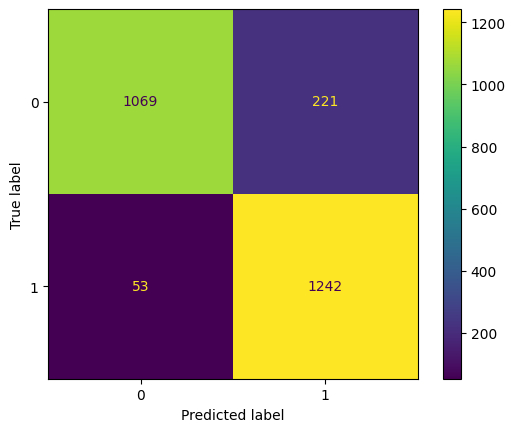

In [69]:
#Testing model on train data.

y_pred_lgbm_test = rfc_final.predict(X_train_scaled)

print(accuracy_score(Y_train, y_pred_lgbm_test))

conf_mat = confusion_matrix(Y_train, y_pred_lgbm_test)

ConfusionMatrixDisplay(conf_mat).plot()

print(classification_report(Y_train, y_pred_lgbm_test))

plt.show()

0.7990726429675425
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       326
           1       0.75      0.90      0.82       321

    accuracy                           0.80       647
   macro avg       0.81      0.80      0.80       647
weighted avg       0.81      0.80      0.80       647



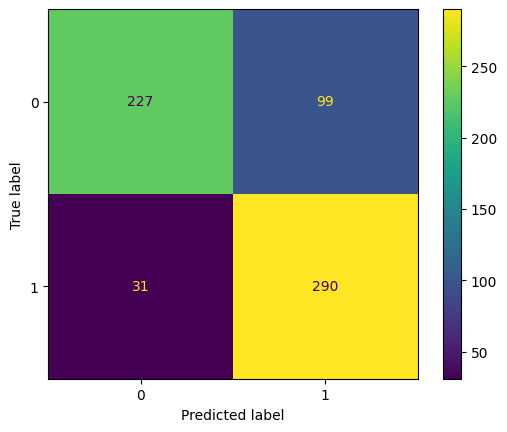

In [70]:
#Prediction on test data.

y_pred_lgbm_test = rfc_final.predict(X_test_scaled)

print(accuracy_score(Y_test, y_pred_lgbm_test))

conf_mat2 = confusion_matrix(Y_test, y_pred_lgbm_test)

ConfusionMatrixDisplay(conf_mat2).plot()

print(classification_report(Y_test, y_pred_lgbm_test))

plt.show()

#### We can see an improvement in the accuracy (80%) as compared to Decision tree. The F1 score has also improved (82%) representing a higher precision and recall for the positive class.

#### Model Building with GBDT

In [71]:
#Estimating best parameters for GBDT.

params = {
    'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8],
    'min_samples_split': [2, 4, 6]
}

gbc = GradientBoostingClassifier(random_state=42)

gs1 = GridSearchCV(gbc, param_grid=params, cv=5, scoring='f1', n_jobs=-1)
gs1.fit(X_train_scaled, Y_train)

print(gs1.best_params_)
print(gs1.best_score_)

{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 200}
0.8496255931190652


In [72]:
#Fitting GBDT with best parameters.

gbc_final = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=300, random_state=42)
gbc_final.fit(X_train_scaled, Y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=300,
                           random_state=42)

0.9574468085106383
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1290
           1       0.93      0.99      0.96      1295

    accuracy                           0.96      2585
   macro avg       0.96      0.96      0.96      2585
weighted avg       0.96      0.96      0.96      2585



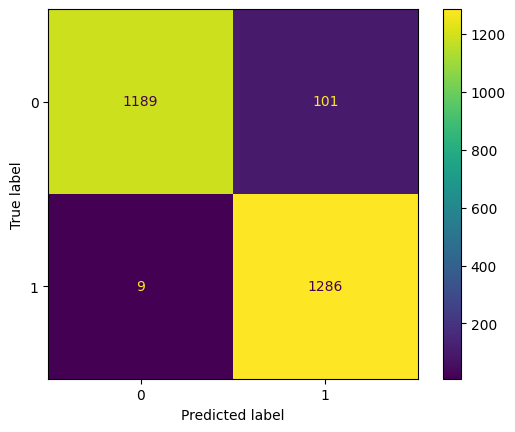

In [73]:
#Prediction on train.

y_pred_lgbm = gbc_final.predict(X_train_scaled)

print(accuracy_score(Y_train, y_pred_lgbm))

conf_mat = confusion_matrix(Y_train, y_pred_lgbm)

ConfusionMatrixDisplay(conf_mat).plot()

print(classification_report(Y_train, y_pred_lgbm))

plt.show()

0.7990726429675425
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       326
           1       0.75      0.90      0.82       321

    accuracy                           0.80       647
   macro avg       0.81      0.80      0.80       647
weighted avg       0.81      0.80      0.80       647



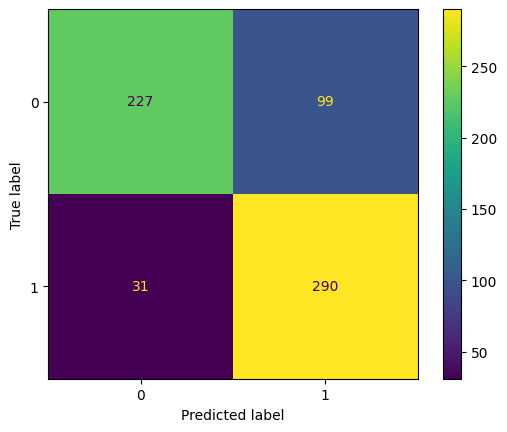

In [74]:
#Prediction on test data.

y_pred_lgbm_test = rfc_final.predict(X_test_scaled)

print(accuracy_score(Y_test, y_pred_lgbm_test))

conf_mat2 = confusion_matrix(Y_test, y_pred_lgbm_test)

ConfusionMatrixDisplay(conf_mat2).plot()

print(classification_report(Y_test, y_pred_lgbm_test))

plt.show()

#### Gradient Boosted Decision Tree performs the same as Random Forest with accuracy 80% and F1 score of 82%. 
#### Now we try with other ensemble techniques.

**----------------------------------------------------------------------------------------------------**

#### Model Building with XGBOOST

In [76]:
#Estimating best parameters for XGBOOST.

params = {
    'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'colsample_bylevel': [0.8, 0.9],
    'colsample_bynode': [0.7, 0.8]
}

xgbc = XGBClassifier(random_state=42)

gs2 = GridSearchCV(xgbc, param_grid=params, cv=5, scoring='f1', n_jobs=-1)
gs2.fit(X_train_scaled, Y_train)

print(gs2.best_params_)
print(gs2.best_score_)

{'colsample_bylevel': 0.9, 'colsample_bynode': 0.8, 'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
0.8488167115817161


In [77]:
#Fitting XGBC with best parameters.

xgbc_final = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=300, colsample_bytree=0.8, colsample_bylevel=0.9, colsample_bynode=0.9, random_state=42)
xgbc_final.fit(X_train_scaled, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=0.9, colsample_bytree=0.8,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

0.9632495164410058
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1290
           1       0.94      0.99      0.96      1295

    accuracy                           0.96      2585
   macro avg       0.96      0.96      0.96      2585
weighted avg       0.96      0.96      0.96      2585



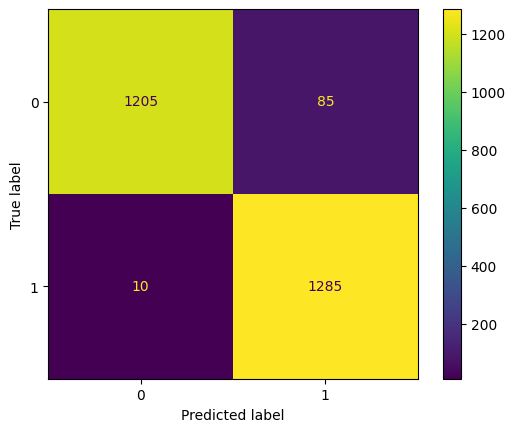

In [78]:
#Prediction on train.

y_pred_lgbm = xgbc_final.predict(X_train_scaled)

print(accuracy_score(Y_train, y_pred_lgbm))

conf_mat = confusion_matrix(Y_train, y_pred_lgbm)

ConfusionMatrixDisplay(conf_mat).plot()

print(classification_report(Y_train, y_pred_lgbm))

plt.show()

0.8284389489953632
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       326
           1       0.80      0.88      0.84       321

    accuracy                           0.83       647
   macro avg       0.83      0.83      0.83       647
weighted avg       0.83      0.83      0.83       647



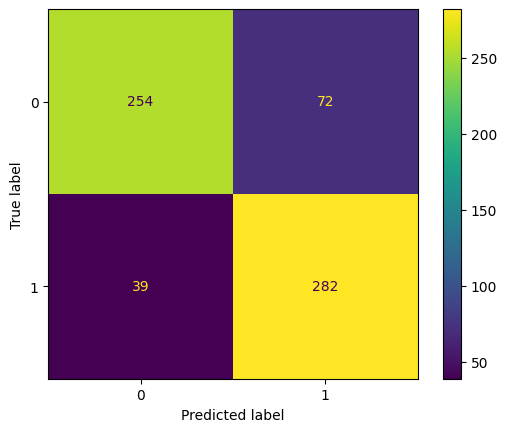

In [79]:
#Prediction on test data.

y_pred_lgbm_test = xgbc_final.predict(X_test_scaled)

print(accuracy_score(Y_test, y_pred_lgbm_test))

conf_mat2 = confusion_matrix(Y_test, y_pred_lgbm_test)

ConfusionMatrixDisplay(conf_mat2).plot()

print(classification_report(Y_test, y_pred_lgbm_test))

plt.show()

#### XGBoost gives a better accuracy of 82%. The F1 score has also improved (84%) with a good balance betwen precision(80%) and recall(88%)

**----------------------------------------------------------------------------------------------------**

#### Model Building with LightGBM

In [121]:
#Finding best parameters for LightGBM.

params = {
    'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8],
    'feature_fraction': [0.7, 0.8, 0.9, 1.0],
    'verbose': [-1]
}

lgbm = LGBMClassifier(random_state=42)

gs3 = GridSearchCV(lgbm, param_grid=params, cv=5, scoring='f1', n_jobs=-1)
gs3.fit(X_train_scaled, Y_train)

print(gs3.best_params_)
print(gs3.best_score_)

{'feature_fraction': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'verbose': -1}
0.8515180616898984


In [122]:
#Fitting LGBMC with best parameters.

lgbm_final = LGBMClassifier(feature_fraction=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, random_state=42)
lgbm_final.fit(X_train_scaled, Y_train)

LGBMClassifier(feature_fraction=0.8, learning_rate=0.05, max_depth=5,
               n_estimators=300, random_state=42)

0.9392649903288202
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1290
           1       0.91      0.98      0.94      1295

    accuracy                           0.94      2585
   macro avg       0.94      0.94      0.94      2585
weighted avg       0.94      0.94      0.94      2585



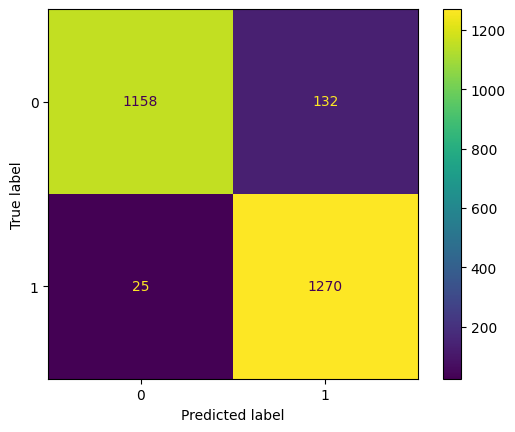

In [123]:
#Prediction on train.

y_pred_lgbm = lgbm_final.predict(X_train_scaled)

print(accuracy_score(Y_train, y_pred_lgbm))

conf_mat = confusion_matrix(Y_train, y_pred_lgbm)

ConfusionMatrixDisplay(conf_mat).plot()

print(classification_report(Y_train, y_pred_lgbm))

plt.show()

0.8253477588871716
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       326
           1       0.79      0.88      0.83       321

    accuracy                           0.83       647
   macro avg       0.83      0.83      0.82       647
weighted avg       0.83      0.83      0.82       647



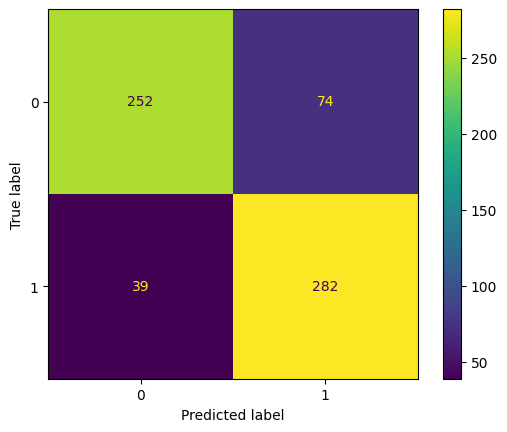

In [124]:
#Prediction on test data.

y_pred_lgbm_test = lgbm_final.predict(X_test_scaled)

print(accuracy_score(Y_test, y_pred_lgbm_test))

conf_mat2 = confusion_matrix(Y_test, y_pred_lgbm_test)

ConfusionMatrixDisplay(conf_mat2).plot()

print(classification_report(Y_test, y_pred_lgbm_test))

plt.show()

#### We see a minute decrease in accuracy(82.5%) as compared to XGBC(82.8%). The F1 score remains the same.

**----------------------------------------------------------------------------------------------------**

#### Comparing model performance using ROC and PR curves

In [125]:
#Getting probabilities of each model.

prob_DT = dtc_final.predict_proba(X_test_scaled)
prob_RF = rfc_final.predict_proba(X_test_scaled)
prob_GBDT = gbc_final.predict_proba(X_test_scaled)
prob_XGBC = xgbc_final.predict_proba(X_test_scaled)
prob_LGBM = lgbm_final.predict_proba(X_test_scaled)

In [126]:
#Extracting the probabilities of positive class.

prob_DT_positive = prob_DT[:,1]
prob_RF_positive = prob_RF[:,1]
prob_GBDT_positive = prob_GBDT[:,1]
prob_XGBC_positive = prob_XGBC[:,1]
prob_LGBM_positive = prob_LGBM[:,1]

In [127]:
#Getting false positive and true positive rates for all models at different thresholds.

fpr_DT, tpr_DT, thr_DT = roc_curve(Y_test, prob_DT_positive)
fpr_RF, tpr_RF, thr_RF = roc_curve(Y_test, prob_RF_positive)
fpr_GBDT, tpr_GBDT, thr_GBDT = roc_curve(Y_test, prob_GBDT_positive)
fpr_XGBC, tpr_XGBC, thr_XGBC = roc_curve(Y_test, prob_XGBC_positive)
fpr_LGBM, tpr_LGBM, thr_LGBM = roc_curve(Y_test, prob_LGBM_positive)

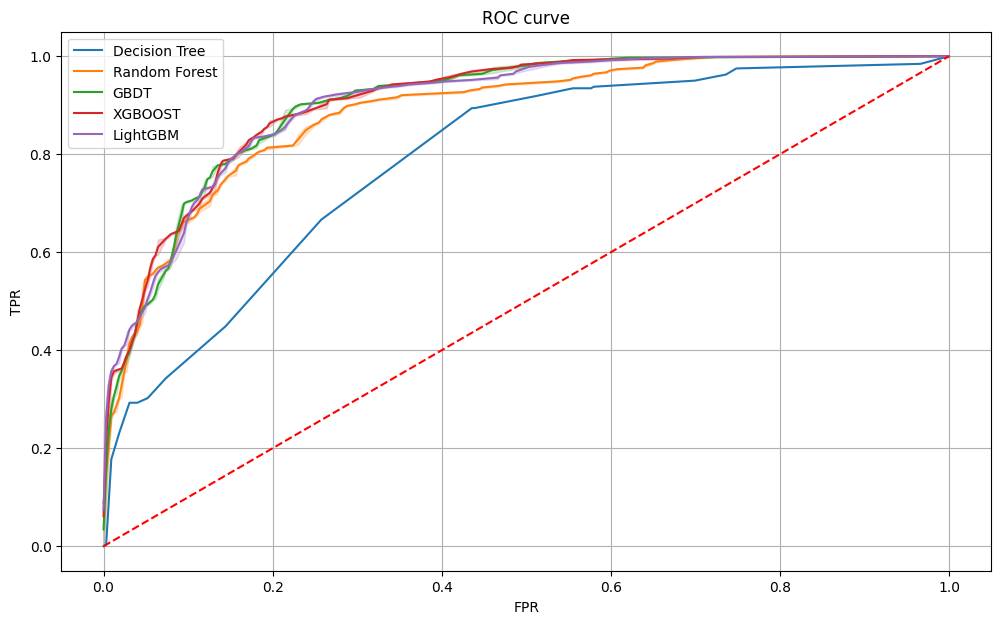

In [128]:
#Plot of TPR vs FPR.

plt.figure(figsize=(12,7))

sns.lineplot(x=fpr_DT,y=tpr_DT, label='Decision Tree')
sns.lineplot(x=fpr_RF,y=tpr_RF, label='Random Forest')
sns.lineplot(x=fpr_GBDT,y=tpr_GBDT, label='GBDT')
sns.lineplot(x=fpr_XGBC,y=tpr_XGBC, label='XGBOOST')
sns.lineplot(x=fpr_LGBM,y=tpr_LGBM, label='LightGBM')


sns.lineplot(x=fpr_DT,y=fpr_DT, linestyle='--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend()
plt.show()

#### We now compare the model performances using the ROC curve. A good model would have high true positive rate and low false positive rate.
#### The graph which we can see above validates what we saw earlier during model evaluation.
#### Decision tree performs the worst among all the models, then comes Random Forest. GBDT, XGBOOST and LigthGBM perform almost the same.

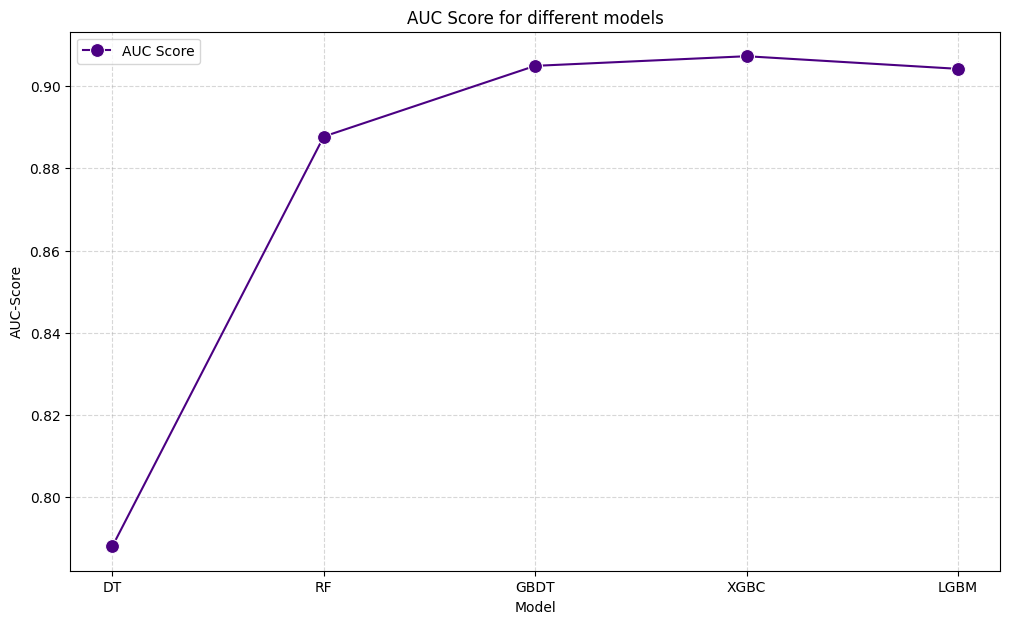

Best AUC Score: 0.9072874261796915


In [161]:
#Area under curve values for ROC curve for all models.

auc_score = []

probabilities = [prob_DT_positive, prob_RF_positive, prob_GBDT_positive, prob_XGBC_positive, prob_LGBM_positive]

for prob in probabilities:
    auc_score.append(roc_auc_score(Y_test, prob))

plt.figure(figsize=(12,7))
sns.lineplot(x=['DT', 'RF', 'GBDT', 'XGBC', 'LGBM'], y=auc_score, marker='o', markersize=10, label='AUC Score', color='indigo')
plt.xlabel('Model')
plt.ylabel('AUC-Score')
plt.title('AUC Score for different models')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()
print(f"Best AUC Score: {max(auc_score)}")

#### The best performing model is XGBOOST with AUC score of 90.7%. This means that model has a 90.7% probability of ranking the positive sample higher than the negative sample.

#### PR Curve

In [130]:
#Getting precision and recall values of all models at different thresholds.

precision_DT, recall_DT, PR_thr_DT = precision_recall_curve(Y_test, prob_DT_positive)
precision_RF, recall_RF, PR_thr_RF = precision_recall_curve(Y_test, prob_RF_positive)
precision_GBDT, recall_GBDT, PR_thr_GBDT = precision_recall_curve(Y_test, prob_GBDT_positive)
precision_XGBC, recall_XGBC, PR_thr_XGBC = precision_recall_curve(Y_test, prob_XGBC_positive)
precision_LGBM, recall_LGBM, PR_thr_LGBM = precision_recall_curve(Y_test, prob_LGBM_positive)

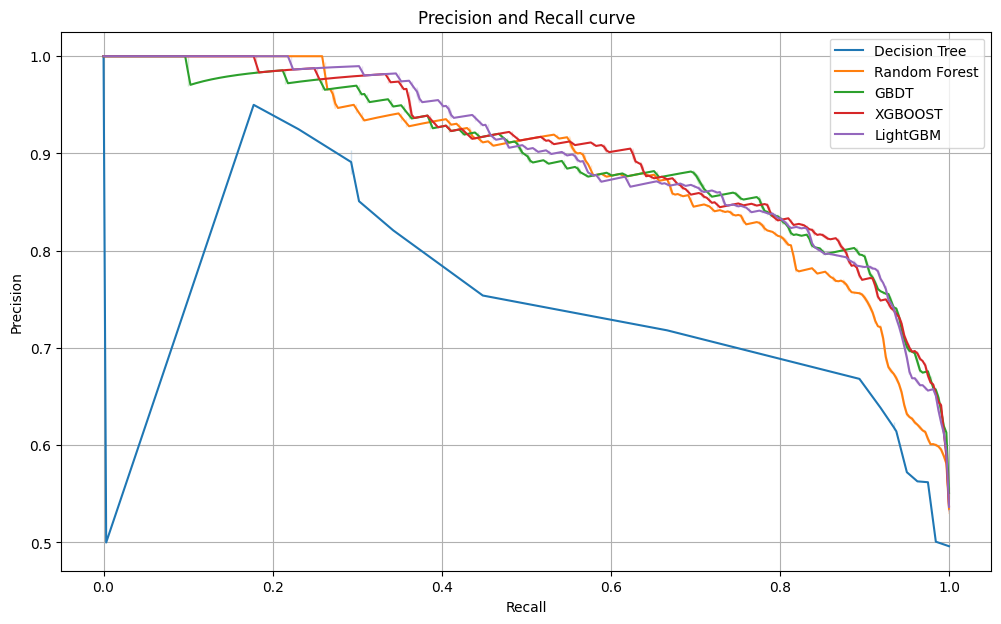

In [131]:
#Plot of Precision vs Recall.

plt.figure(figsize=(12,7))

sns.lineplot(y=precision_DT,x=recall_DT, label='Decision Tree')
sns.lineplot(y=precision_RF,x=recall_RF, label='Random Forest')
sns.lineplot(y=precision_GBDT,x=recall_GBDT, label='GBDT')
sns.lineplot(y=precision_XGBC,x=recall_XGBC, label='XGBOOST')
sns.lineplot(y=precision_LGBM,x=recall_LGBM, label='LightGBM')

plt.title('Precision and Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.legend()
plt.show()

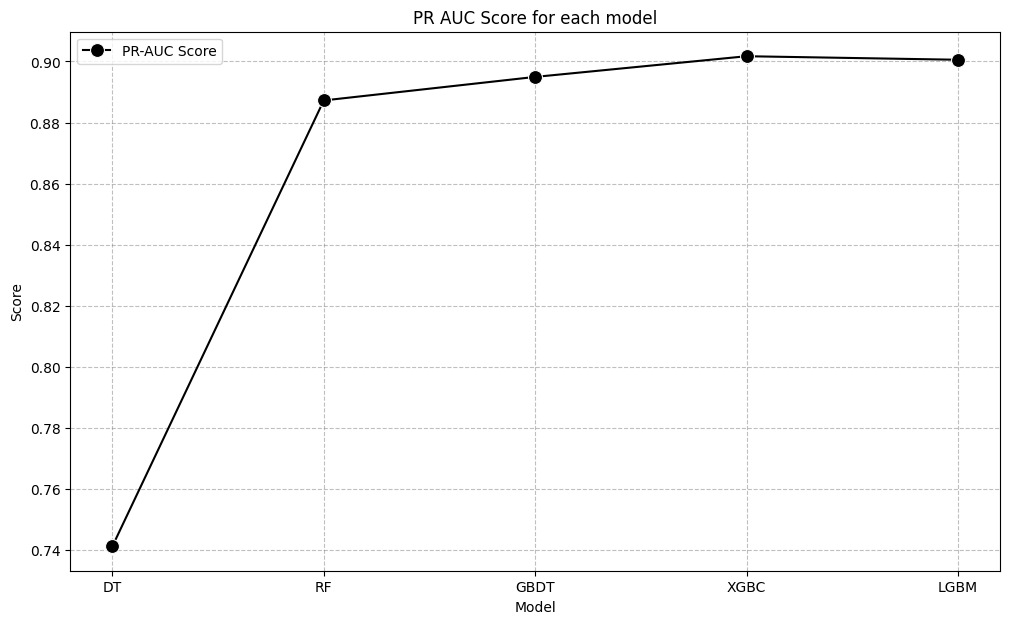

Best AUC PR score: 0.9017152349475688


In [163]:
#Area under curve values for precision and recall curve.

pr_auc_score = []

precision = [precision_DT, precision_RF, precision_GBDT, precision_XGBC, precision_LGBM]
recall = [recall_DT, recall_RF, recall_GBDT, recall_XGBC, recall_LGBM]

for R, P in zip(recall, precision):
    pr_auc_score.append(auc(R,P))

plt.figure(figsize=(12,7))

sns.lineplot(x=['DT', 'RF', 'GBDT', 'XGBC', 'LGBM'], y=pr_auc_score, marker='o', markersize=10, label='PR-AUC Score', color='black')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('PR AUC Score for each model')
plt.grid(visible=True, linestyle='--', alpha=0.5, color='grey')
plt.show()
print(f"Best AUC PR score: {max(pr_auc_score)}")

#### XGBoost has as PR score of 90.17%. The model is effective in predicting the positive classes.

#### Feature Importances from best performing model (XGBOOST)

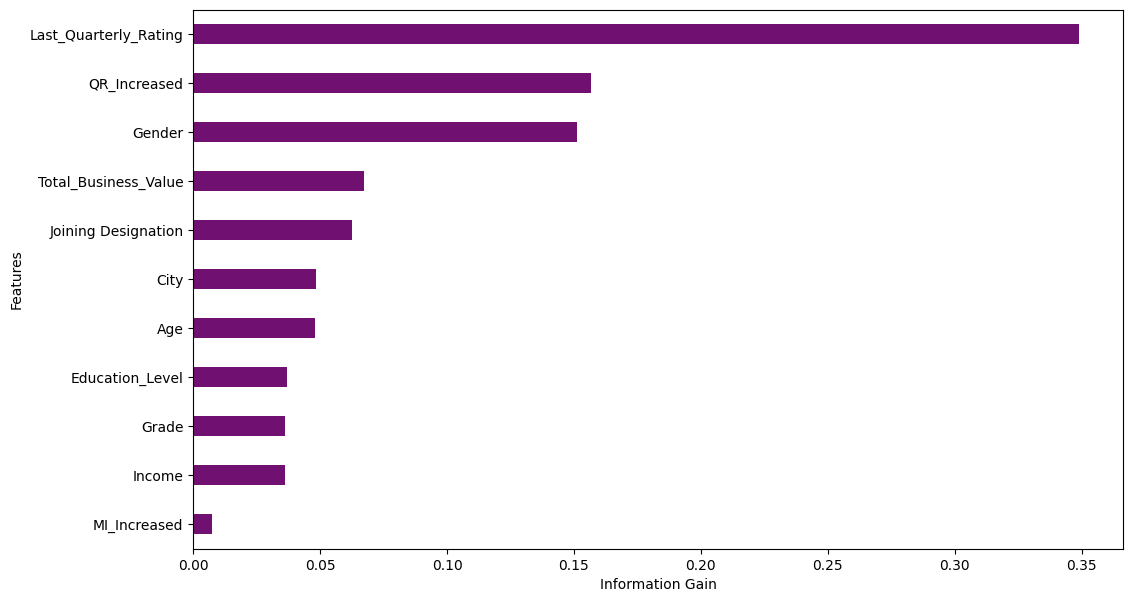

In [162]:
feature_imp = xgbc_final.feature_importances_
feaure_names = X_train.columns

z = dict(zip(feaure_names, feature_imp))
sorted_z = dict(sorted(z.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12,7))
sns.barplot(x=sorted_z.values(), y=sorted_z.keys(), color='purple', width=0.4)
plt.xlabel('Information Gain')
plt.ylabel('Features')
plt.show()

#### 'Last_Quarterly_Earning' plays the most important feature in the classification decision.